_____
***Проект: Обучение с учителем: качество модели***
_____
**Описание проекта.**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и ему поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.    
_____
**Цели проекта.**
    
В ходе проекта будет промаркирован уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
Кроме того, построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.
_____
**Исходные данные.**

Работа в проекте будет проведена со следующими данными:
- Таблица market_file.csv содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. 
- Таблица market_money.csv с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. 
- Таблица market_time.csv с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. 
- Таблица money.csv с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
______
**Этапы проектной работы.**

- [Загрузка данных](#str1): загрузка и проверка данных. 
- [Предобработка данных](#str2): проверка на наличие пропусков и дубликатов, устранение при наличии, проверка корректности типов данных у каждого признака. 
- [Исследовательский анализ данных](#str3): статистический анализ всех признаков, отбор клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.
- [Объединение таблиц](#str4): объединение таблиц market_file.csv, market_money.csv, market_time.csv. В итоговой таблице создание отдельного столбца для каждого периода.
- [Корреляционный анализ](#str5): корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Выводы о мультиколлинеарности.
- [Использование пайплайнов](#str6): применение пайплайнов, обучение четырех моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Выбор лучшей модели, используя заданную метрику.
- [Анализ важности признаков](#str7): оценка важности признаков для лучшей модели и график важности с помощью метода SHAP. Выводы о значимости признаков (какие признаки мало значимы для модели, какие признаки сильнее всего влияют на целевой признак, как можно использовать эти наблюдения при моделировании и принятии бизнес-решений).
- [Сегментация покупателей](#str8): увеличение покупательской активности группы покупателей, графическое и аналитическое исследование группы покупателей. Предложения по работе с сегментом для увеличения покупательской активности. Выводы о сегментах: какой сегмент выбран для дополнительного исследования, обоснование выбора предложений.
- [Общий вывод](#str9): описание исходной задачи, первичных данных и проведенной предобработки. Процесс поиска и выявление лучшей модели. Выводы и дополнительные предложения для выбранного сегмента покупателей.
_____

## Загрузка данных
<a id='str1'></a>

In [1]:
# Установка библиотек
!pip install shap -q
!pip install phik -q
!pip install --upgrade scikit-learn -q
!pip install matplotlib==3.7.3 -q

In [2]:
# Подключение библиотек, настроек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import shap
import phik
import math

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score
from scipy import stats as st 
from sklearn.impute import SimpleImputer 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.calibration import CalibratedClassifierCV
from phik.report import plot_correlation_matrix
from phik import report

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
# Считывание файлов с данными и сохранение их в датафреймы
data = pd.read_csv("/datasets/market_file.csv", sep=',')
money = pd.read_csv("/datasets/market_money.csv", sep=',')
time = pd.read_csv("/datasets/market_time.csv", sep=',')
profit = pd.read_csv("/datasets/money.csv", sep=';', decimal=',')

In [4]:
data.head() # первые пять строк таблицы

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
money.head() # первые пять строк таблицы

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
time.head() # первые пять строк таблицы

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [7]:
profit.head() # первые пять строк таблицы

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


После загрузки данных из таблиц можно сделать вывод, что они соответствуют описанию:
- market_file.csv (data): Данные о поведении покупателей на сайте, включая информацию о коммуникациях и продуктовом поведении, успешно загружены. Это позволит нам анализировать взаимодействие клиентов с платформой.
- market_money.csv (money): Данные о выручке, полученной от каждого покупателя, также корректно загружены. Эти данные помогут оценить финансовую эффективность взаимодействия с клиентами.
- market_time.csv (time): Информация о времени, проведённом покупателями на сайте, загружена без ошибок. Это позволит понять, сколько времени клиенты тратят на изучение товаров и совершение покупок.
- money.csv (profit): Данные о среднемесячной прибыли продавца за последние 3 месяца успешно загружены. Это важно для оценки долгосрочной рентабельности бизнеса и понимания, какую прибыль приносит каждый покупатель.

На следующем этапе необходимо провести корректировку и приведение данных к общему виду, а также выполнить предобработку, чтобы обеспечить их корректное использование в анализе. 

##  Предобработка данных
<a id='str2'></a>

In [8]:
data.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [9]:
data.describe() # информация по числовым данным

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [10]:
print(f"Пропусков: {data.isna().sum()}")  # количество пропусков
print(f"Дубликатов: {data.duplicated().sum()}")  # количество дубликатов

Пропусков: id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
Дубликатов: 0


In [11]:
money.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [12]:
money.describe() # информация по числовым данным

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [13]:
print(f"Пропусков: {money.isna().sum()}")  # количество пропусков
print(f"Дубликатов: {money.duplicated().sum()}")  # количество дубликатов

Пропусков: id         0
Период     0
Выручка    0
dtype: int64
Дубликатов: 0


In [14]:
time.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [15]:
time.describe() # информация по числовым данным

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [16]:
print(f"Пропусков: {time.isna().sum()}")  # количество пропусков
print(f"Дубликатов: {time.duplicated().sum()}")  # количество дубликатов

Пропусков: id        0
Период    0
минут     0
dtype: int64
Дубликатов: 0


In [17]:
profit.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [18]:
profit.describe() # информация по числовым данным

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [19]:
print(f"Пропусков: {profit.isna().sum()}")  # количество пропусков
print(f"Дубликатов: {profit.duplicated().sum()}")  # количество дубликатов

Пропусков: id         0
Прибыль    0
dtype: int64
Дубликатов: 0


In [20]:
# Поиск неявных дубликатов
display(data["Покупательская активность"].value_counts())
display(data["Тип сервиса"].value_counts())
display(data["Разрешить сообщать"].value_counts())
display(data["Популярная_категория"].value_counts())
display(money["Период"].value_counts())
display(time["Период"].value_counts())

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

да     962
нет    338
Name: Разрешить сообщать, dtype: int64

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: Период, dtype: int64

предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

In [21]:
# Приведение к общему виду
data["Тип сервиса"] = data["Тип сервиса"].str.replace("стандартт", "стандарт")
time["Период"] = time["Период"].str.replace("предыдцщий_месяц", "предыдущий_месяц")

In [22]:
# Переименование столбцов для удобства
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
money.columns = [col.lower() for col in money.columns]
time.columns = [col.lower() for col in time.columns]
profit.columns = [col.lower() for col in profit.columns]

In [23]:
data.info() # проверка информации датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [24]:
money.info() # проверка информации датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [25]:
time.info() # проверка информации датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [26]:
profit.info() # проверка информации датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


В результате предобработки данных в каждом из четырех датафреймов не обнаружено пропусков и дубликатов. Все данные полные и уникальные. Все названия столбцов были проверены и исправлены на предмет опечаток, теперь они корректно отражают содержание данных. Кроме того, названия столбцов были преобразованы в нижний регистр для унификации и удобства работы с данными. Все изменения были проверены, и данные готовы к дальнейшему анализу и использованию.

## Исследовательский анализ данных
<a id='str3'></a>

In [27]:
# Создание функции для построения гистограммы и "ящика с усами" для столбцов с количественными признаками
def hist_box(df, column):
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column])
    plt.xlabel(f'Значения')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для \n "{column}"')
    plt.grid(axis='y')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.xlabel(f'Значения')
    plt.title(f'Боксплот для \n "{column}"')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Создание функции для построения графика уникальных значений столбца
def cat_unique(df, column):
    display(df[column].unique())
    plt.figure(figsize=(9, 4))
    plot = sns.countplot(y=column, data=df)
    plot.set_title(f'Распределение по "{column}"', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)
    plot.set_ylabel(column, fontsize=14)
    for p in plot.patches:
        plot.annotate(f'{p.get_width()}', 
                      (p.get_width() + 1.0, p.get_y() + p.get_height() / 2),
                      ha='left', va='center', 
                      xytext=(5, 0), 
                      textcoords='offset points')
    plt.xlim(0, plot.get_xlim()[1] + 35)
    plt.show()
    
# Создание списка количественных столбцов датасетов
num_data = ["маркет_актив_6_мес", "маркет_актив_тек_мес", "длительность",
                  "акционные_покупки", "средний_просмотр_категорий_за_визит",
                  "неоплаченные_продукты_штук_квартал","ошибка_сервиса", "страниц_за_визит"]
num_money = ["выручка"] 
num_time = ["минут"] 
num_profit = ["прибыль"] 

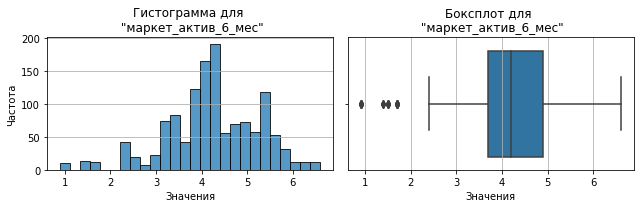

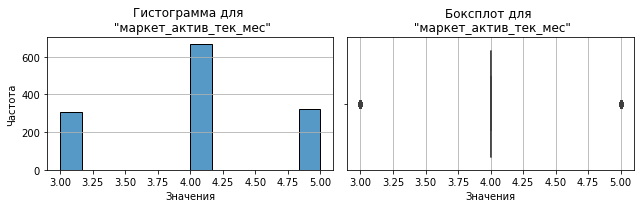

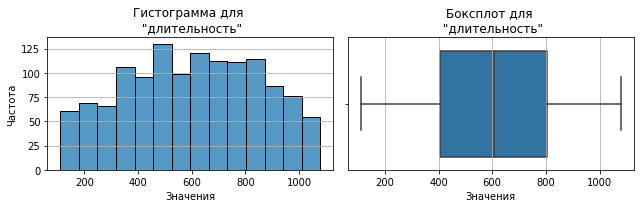

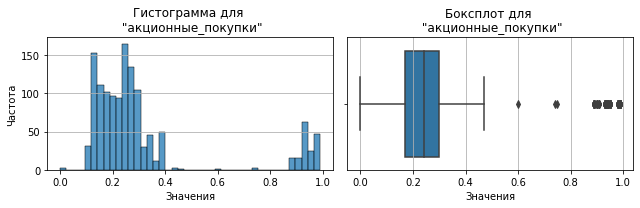

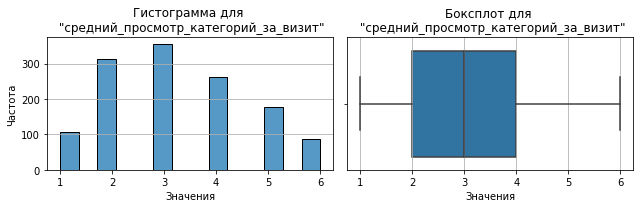

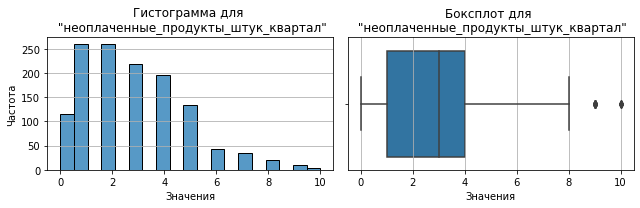

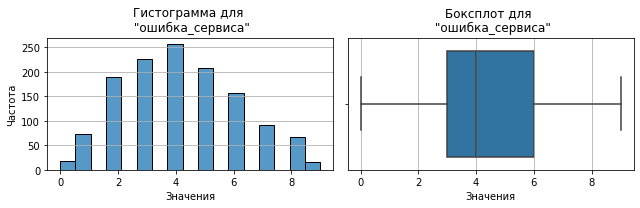

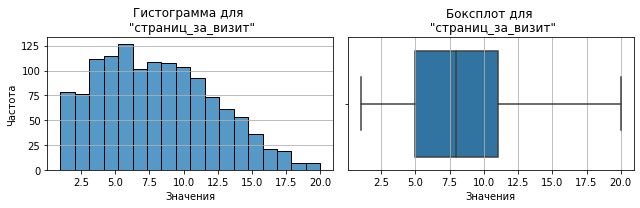

In [28]:
# Построение гистограмм и "ящиков с усами" количественных признаков датасета data
for name in num_data:
    hist_box(data, name)

- "маркет_актив_6_мес". Гистограмма показывает распределение среднемесячного числа маркетинговых коммуникаций за последние 6 месяцев. Вы можете увидеть, что большинство клиентов получают от 2 до 6 коммуникаций в месяц, с пиком на уровне 4. Боксплот показывает, что медиана находится на уровне 4, и есть несколько выбросов, которые могут указывать на клиентов с низкой активностью. Большинство покупателей получают умеренное количество маркетинговых коммуникаций, однако некоторые клиенты активно вовлечены в маркетинговые активности.
- "маркет_актив_тек_мес". Клиенты получили от 3 до 5 коммуникаций в текущем месяце, большинство 4. В боксплоте медиана соответственно равна 4. Текущая активность не снизилась по сравнению с предыдущими месяцами.
- "длительность". Гистограмма показывает, как долго клиенты зарегистрированы на сайте. Клиенты зарегистрированы сроками от менее 1 года до 3 лет, большинство на уровне 400-600 дней. Медиана на уровне 600 дней, без выбросов. Новая клиентская база растет, но есть и долгосрочные клиенты, требующие внимания.
- "акционные_покупки". Большинство клиентов делают 10-40% своих покупок по акции, но также есть и клиенты, делающие 90% покупок по акциям. Медиана составляет около 20%, с некоторыми выбросами, указывающими на клиентов, которые активно пользуются акциями. Акционные предложения пользуются популярностью, что может быть хорошей стратегией для привлечения клиентов.
- "средний_просмотр_категорий_за_визит". Гистограмма показывает, сколько категорий товаров клиенты просматривают за один визит. Большинство клиентов просматривают 2-4 категории. Медиана на уровне 3. Это указывает на умеренный интерес к разнообразию продуктов.
- "неоплаченные_продукты_штук_квартал". Большинство клиентов оставляют 1-2 неоплаченных товара в корзине. Медиана равна 3, но есть клиенты, оставляющие до 10 товаров. Проблемы с конверсией могут быть связаны с неоплаченными товарами в корзине.
- "ошибка_сервиса". Гистограмма показывает количество сбоев, которые испытали клиенты. Большинство клиентов сталкивались с 4 ошибками, но есть несколько, у которых было более 8 сбоев. Медиана так же на уровне 4. Это указывает на необходимость улучшения надежности сервиса, чтобы снизить количество ошибок и повысить удовлетворенность пользователей.
- "страниц_за_визит". Большинство клиентов просматривают от 3 до 10 страниц за визит. Медиана составляет около 8 страниц. Клиенты активно исследуют сайт, что свидетельствует о высоком интересе к продуктам.

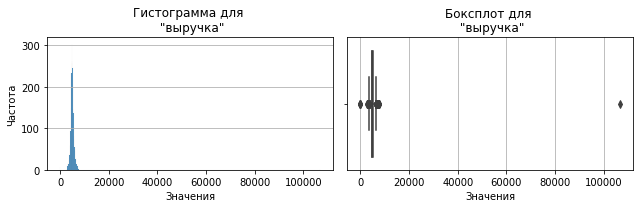

In [29]:
# Построение гистограммы и "ящика с усами" количественного признака датасета money
for name in num_money:
    hist_box(money, name)

Явный выброс мешает прочтению графиков

In [30]:
# Нахождение выброса
money.query('выручка > 20000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [31]:
# Удаление выброса
money["выручка"] = money.loc[money["выручка"] < 20000, "выручка"]

Выброс в столбце выручки устранен.

In [32]:
# Клиенты с нулевой выручкой
money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [33]:
# Удаление нулевых значений выручки
money["выручка"] = money.loc[money["выручка"] > 0, "выручка"]

Все нулевые значения были удалены, так как это позволяет избежать искажений в дальнейших анализах и расчетах, потому что нулевая выручка может негативно влиять на результаты.

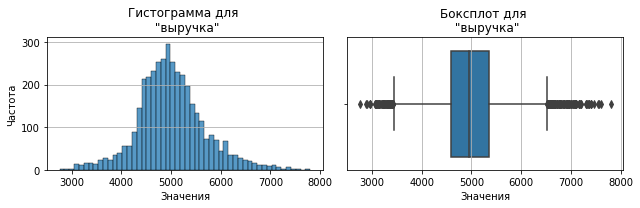

In [34]:
# Построение гистограммы и "ящика с усами" количественного признака датасета money без выбросов
for name in num_money:
    hist_box(money, name)

На графике видно, что большинство значений сосредоточено в диапазоне от 3000 до 7000. Явный пик наблюдается на уровне 5000, что указывает на то, что многие покупатели тратят именно эту сумму. На боксплоте медиана выручки находится так же около 5000. Нижний квартиль примерно 3500, а верхний квартиль около 6500. Есть несколько выбросов, которые могут указывать на клиентов, потративших меньше либо значительно больше, чем остальные.

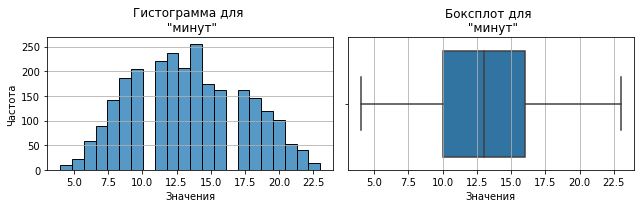

In [35]:
# Построение гистограммы и "ящика с усами" количественного признака датасета time
for name in num_time:
    hist_box(time, name)

На графике видно, что клиенты проводят на сайте от 6 до 21 минуты, большинство около 14 минут. Боксплот показывает, что медиана времени составляет 13 минут. Это говорит о том, что половина клиентов проводит время в этом диапазоне.

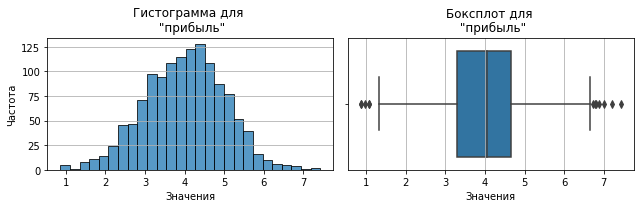

In [36]:
# Построение гистограммы и "ящика с усами" количественного признака датасета profit
for name in num_profit:
    hist_box(profit, name)

Гистограмма демонстрирует, что среднемесячная прибыль, получаемая от каждого покупателя, колеблется в диапазоне от 2 до 6. Наиболее частый уровень прибыли составляет около 4,5, в то время как медиана прибыли равна 4. Это свидетельствует о том, что большинство клиентов приносят прибыль на уровне ниже среднего, и есть потенциал для увеличения доходов от продаж.

array(['Снизилась', 'Прежний уровень'], dtype=object)

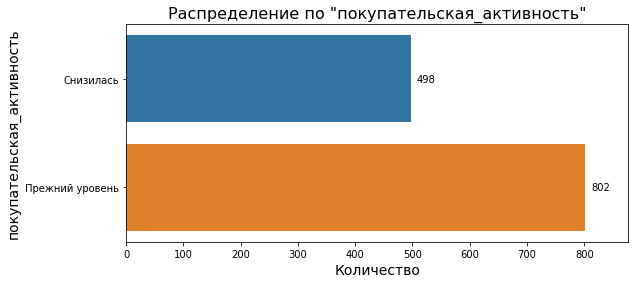

In [37]:
# Построение графика уникальных значений датасета data
cat_unique(data, "покупательская_активность")

array(['премиум', 'стандарт'], dtype=object)

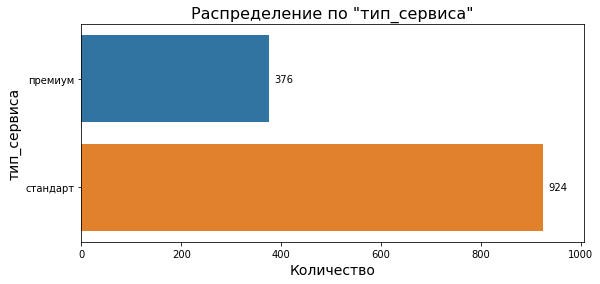

In [38]:
# Построение графика уникальных значений датасета data
cat_unique(data, "тип_сервиса")

array(['да', 'нет'], dtype=object)

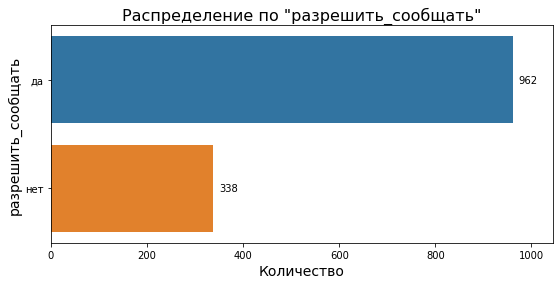

In [39]:
# Построение графика уникальных значений датасета data
cat_unique(data, "разрешить_сообщать")

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

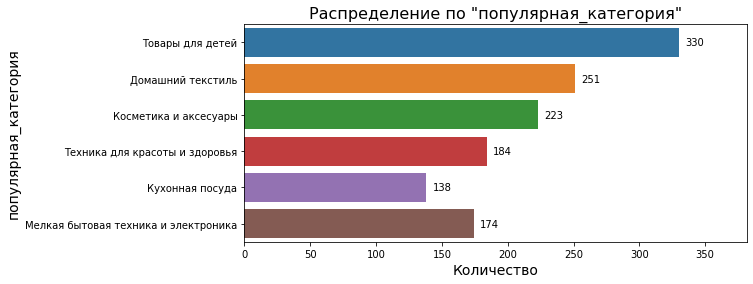

In [40]:
# Построение графика уникальных значений датасета data
cat_unique(data, "популярная_категория")

По категориальным признакам, можно сказать следующее. Большинство клиентов (802) сохраняют прежний уровень активности, в то время как у 498 клиентов отмечено понижение активности. Преобладает стандартный сервис, которым пользуются 924 клиента, по сравнению с премиум-сервисом, который выбирают 376 клиентов. Большинство клиентов (962) согласны на получение дополнительных предложений, однако 338 клиентов предпочитают не получать такие коммуникации. Самая популярная категория товаров у покупателя за последние 6 месяцев, это товары для детей, интересовались 330 клиентов. Самая непопулярная - кухонная посуда (138).

In [41]:
# Удаление строк с отсутствующими значениями в столбце 'выручка'
money = money.dropna(subset=['выручка'])

# Группировка данных по id и агрегирование
agg_data = money.groupby('id').agg(
    unique_periods=('период', 'nunique'),  # Подсчет уникальных периодов
    min_revenue=('выручка', 'min')         # Подсчет минимальной выручки
).reset_index()

# Отбор клиентов с активностью ровно три месяца и с положительной выручкой
active_customers = agg_data[(agg_data['unique_periods'] == 3) & (agg_data['min_revenue'] > 0)]

print(len(active_customers))

1296


Получен результат 1296, почти все клиенты были активны в течение трех месяцев.

Исследовательский анализ данных показал следующее. За последние 6 месяцев большинство клиентов получали от 2 до 6 маркетинговых коммуникаций в месяц, с пиком на уровне 4. Это свидетельствует о том, что компания поддерживает умеренный уровень взаимодействия с клиентами, что может быть эффективным для удержания их интереса. Текущие данные показывают, что активность не снизилась, что является положительным знаком. Большинство клиентов зарегистрированы на сайте более 600 дней, что указывает на наличие как новых, так и долгосрочных клиентов. Это разнообразие требует внимания к различным сегментам клиентской базы. Акции привлекают внимание клиентов, так как многие из них совершают значительную часть своих покупок по акциям. Это открывает возможности для дальнейшего развития акционных предложений, чтобы увеличить лояльность клиентов. Наличие неоплаченных товаров в корзине указывает на возможные проблемы с конверсией. Это требует дополнительного анализа для выявления причин и возможных решений. Наличие сбоев в работе сервиса может негативно сказываться на удовлетворенности клиентов. Улучшение надежности сервиса станет важным шагом для повышения клиентского опыта. Клиенты активно исследуют сайт, проводя в среднем около 14 минут за визит, однако большинство из них приносит прибыль ниже среднего. Это создает потенциал для увеличения доходов через улучшение предложений и маркетинговых стратегий. Почти все клиенты (1296) были активны в течение последних трех месяцев, что говорит о стабильной клиентской базе и высоком уровне вовлеченности. В целом, результаты анализа показывают, что компания имеет сильную клиентскую базу с хорошей активностью, но также существуют области для улучшения, такие как увеличение конверсии и устранение ошибок сервиса. Разработка стратегий, направленных на повышение лояльности клиентов и улучшение их опыта, может привести к увеличению доходов.

## Объединение таблиц
<a id='str4'></a>

In [42]:
# Пивотирование таблиц
money_pivot = money.pivot_table(index=["id"], columns=["период"], values='выручка')
money_pivot.columns = ["выручка_предыдущий_месяц", "выручка_препредыдущий_месяц", "выручка_текущий_месяц"]
money_pivot = money_pivot.reset_index()  # Сброс индекса, чтобы id стал обычным столбцом
time_pivot = time.pivot_table(index=["id"], columns=["период"], values='минут')
time_pivot.columns = ["минут_предыдущий_месяц", "минут_текущий_месяц"]
time_pivot = time_pivot.reset_index()  # Сброс индекса, чтобы id стал обычным столбцом

# Объединение таблиц
merged_data = pd.merge(data, money_pivot, on='id', how='left')
merged_data = pd.merge(merged_data, time_pivot, on='id', how='left')

# Проверка итоговой таблицы
merged_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


В результате объединения данных из таблиц market_file.csv, market_money.csv и market_time.csv была создана новая таблица merged_data, содержащая информацию о клиентах, их выручке и времени на сайте за три месяца. Структура таблицы включает столбцы для выручки и времени по каждому из трех периодов с понятными названиями. Но были обнаружены строки с Nan

In [43]:
merged_data.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               3
выручка_препредыдущий_месяц            3
выручка_текущий_месяц                  1
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

In [44]:
# Удаление строк с NaN
merged_data.dropna(inplace=True)

In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

In [46]:
# Проверка на наличие дубликатов
dupl = merged_data.duplicated()
print(f"Количество дубликатов: {dupl.sum()}")

Количество дубликатов: 0


После анализа удалены строки с NaN значениями, что позволило очистить данные от неполных записей. Дубликатов нет.

## Корреляционный анализ
<a id='str5'></a>

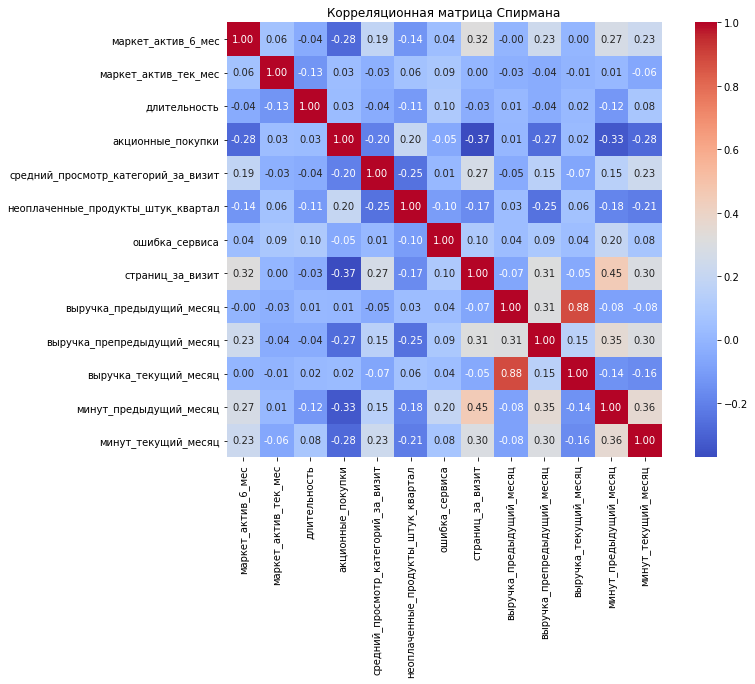

In [47]:
correlation_matrix = merged_data.drop(columns=['id']).corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Корреляционная матрица Спирмана')
plt.show()

Наиболее выраженная коллинеарность наблюдается между "выручка_предыдущий_месяц" и "выручка_текущий_месяц", так как их связь 0.88, мультиколлинеарность не наблюдается. Это может указывать на потенциальную избыточность информации. Остальные пары признаков имеют умеренные корреляции.

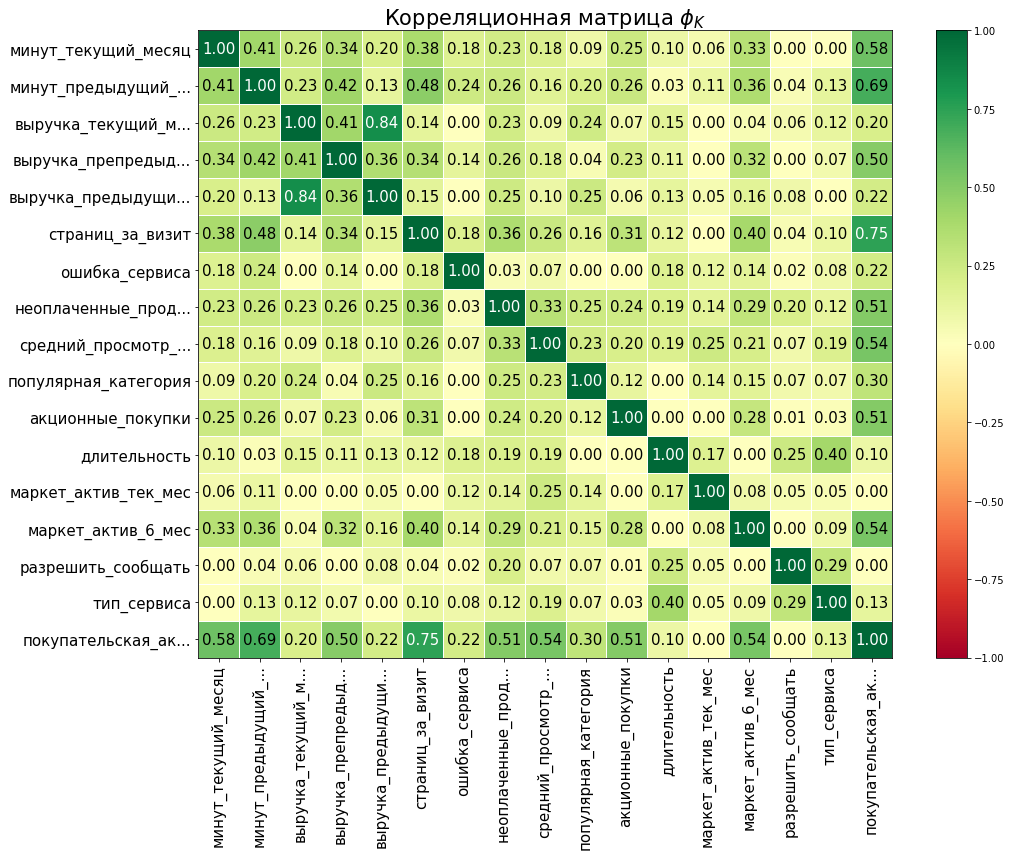

In [48]:
# Список интервальных признаков
interval_cols = [
    "маркет_актив_6_мес", "маркет_актив_тек_мес", "длительность",
    "акционные_покупки", "средний_просмотр_категорий_за_визит",
    "неоплаченные_продукты_штук_квартал", "ошибка_сервиса",
    "страниц_за_визит", "выручка_предыдущий_месяц",
    "выручка_препредыдущий_месяц", "выручка_текущий_месяц",
    "минут_предыдущий_месяц", "минут_текущий_месяц"
]

# Вычисление коэффициентов корреляции
phik_overview = merged_data.drop(columns=['id']).phik_matrix(interval_cols=interval_cols)

# Визуализация тепловой карты
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"Корреляционная матрица $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

В данной матрице также сильная корреляция между "выручка_предыдущий_месяц" и "выручка_текущий_месяц" (0,84), а так же несколько корреляций у целевого признака с другими (страниц_за_визит 0,75, минут_предыдущий_месяц 0,69, минут_текущий_месяц 0,58).

## Использование пайплайнов
<a id='str6'></a>

In [49]:
# Преобразование целевой переменной
merged_data["покупательская_активность"] = merged_data["покупательская_активность"]\
.apply(lambda x: 1 if x == 'Снизилась' else 0)
merged_data["покупательская_активность"] = merged_data["покупательская_активность"].astype(int)
merged_data = merged_data.set_index("id")

# Определение признаков
X = merged_data.drop(["покупательская_активность"], axis=1)
y = merged_data["покупательская_активность"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

# Определение категориальных и числовых признаков
cat_col = ["разрешить_сообщать", "популярная_категория"]
oe_col = ["тип_сервиса"]
num_col = ["маркет_актив_6_мес", "маркет_актив_тек_мес", "длительность",
           "акционные_покупки", "средний_просмотр_категорий_за_визит",
           "неоплаченные_продукты_штук_квартал", "ошибка_сервиса",
           "страниц_за_визит", "выручка_препредыдущий_месяц",
           "минут_предыдущий_месяц", "минут_текущий_месяц",
           "выручка_текущий_месяц", "выручка_предыдущий_месяц"]

# Пайплайн для OHE
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
])

# Пайплайн для OE
oe_pipe = Pipeline([
    ('simpleImputer_oe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Предобработка данных
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, cat_col),
    ('oe', oe_pipe, oe_col),
    ('num', StandardScaler(), num_col)
], remainder='passthrough')

# Финальные пайплайны для моделей
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [50]:
# Словари для моделей
param_grid = [
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(3, 21, 2),  # Изменен диапазон n_neighbors на нечётные значения от 3 до 21
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    {
        'model': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'model': [SVC(random_state=RANDOM_STATE, kernel='poly')],
        'model__degree': range(2, 8),
        'model__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'model': [SVC(random_state=RANDOM_STATE, kernel='poly')],
        'model__degree': range(2, 11),
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'model': [RandomForestClassifier(random_state=RANDOM_STATE)],  # Новая модель
        'model__n_estimators': [50, 100, 200],  # Гиперпараметры для случайного леса
        'model__max_depth': [None, 10, 20, 30],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

В результате выполнения задачи по построению пайплайнов для классификации, мы успешно реализовали процесс подготовки данных и обучения моделей с использованием различных методов кодирования и масштабирования. Обучены четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC. Для каждой модели был подобран хотя бы один гиперпараметр, что позволило оптимизировать их производительность. Теперь можно использовать инструмент подбора гиперпараметров, который вернёт лучшую модель.

In [51]:
# Поиск модели
grid = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
    refit=True,
)

# Обучение модели
grid.fit(X_train, y_train)

# Отображение лучшей модели
best_model = grid.best_estimator_
print(f'Лучшие параметры: {grid.best_params_}')
print(f'ROC-AUC модели: {grid.best_score_:.4f}')
print(f'Лучшая модель: {best_model}')

Fitting 5 folds for each of 189 candidates, totalling 945 fits
Лучшие параметры: {'model': KNeighborsClassifier(), 'model__n_neighbors': 18, 'preprocessor__num': StandardScaler()}
ROC-AUC модели: 0.9036
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
          

In [52]:
# Прогнозирование классов на тестовой выборке
y_pred = grid.predict(X_test)
# Получение вероятностей классов
y_proba = grid.predict_proba(X_test)

# Вычисление метрики ROC-AUC
print(f'ROC-AUC тестовой выборки: {round(roc_auc_score(y_test, y_proba[:, 1]), 4)}')

# Вычисление метрики F1-score
print(f'F1-score тестовой выборки: {round(f1_score(y_test, y_pred, average="binary"), 4)}')

ROC-AUC тестовой выборки: 0.9204
F1-score тестовой выборки: 0.88


В результате проведенного анализа была выбрана модель KNeighborsClassifier с оптимальными гиперпараметрами: количество соседей (n_neighbors) равно 18, а для числовых признаков используется StandardScaler для их нормализации. Полученные результаты показывают впечатляющую эффективность модели: ROC-AUC на обучающей выборке составил 0.90, что указывает на хорошую способность модели различать классы. Для тестовой выборки ROC-AUC составил 0.92, что также свидетельствует о ее высокой надежности.

Дополнительно, F1-score тестовой выборки достиг значения 0.88, что подтверждает отличное сочетание точности и полноты модели. Эти результаты подчеркивают, что выбранная модель KNeighborsClassifier, наряду с соответствующими методами предобработки данных, демонстрирует выдающиеся показатели и является подходящим решением для поставленной задачи. Такой успех также акцентирует важность тщательной настройки гиперпараметров для достижения наилучших результатов.

## Анализ важности признаков
<a id='str7'></a>

In [53]:
# Применяем предварительную обработку
X_train_t = best_model.named_steps['preprocessor'].transform(X_train)
K = 100
background_data = shap.sample(X_train_t, K)  
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Создаем объяснитель SHAP
explainer = shap.KernelExplainer(best_model.named_steps['model'].predict_proba, 
                                 background_data)

# Преобразуем тестовые данные
X_test_t = best_model.named_steps['preprocessor'].transform(X_test)
X_test_t = pd.DataFrame(X_test_t, columns=feature_names)

# Получаем SHAP-значения
shap_values = explainer.shap_values(X_test_t)

  0%|          | 0/324 [00:00<?, ?it/s]

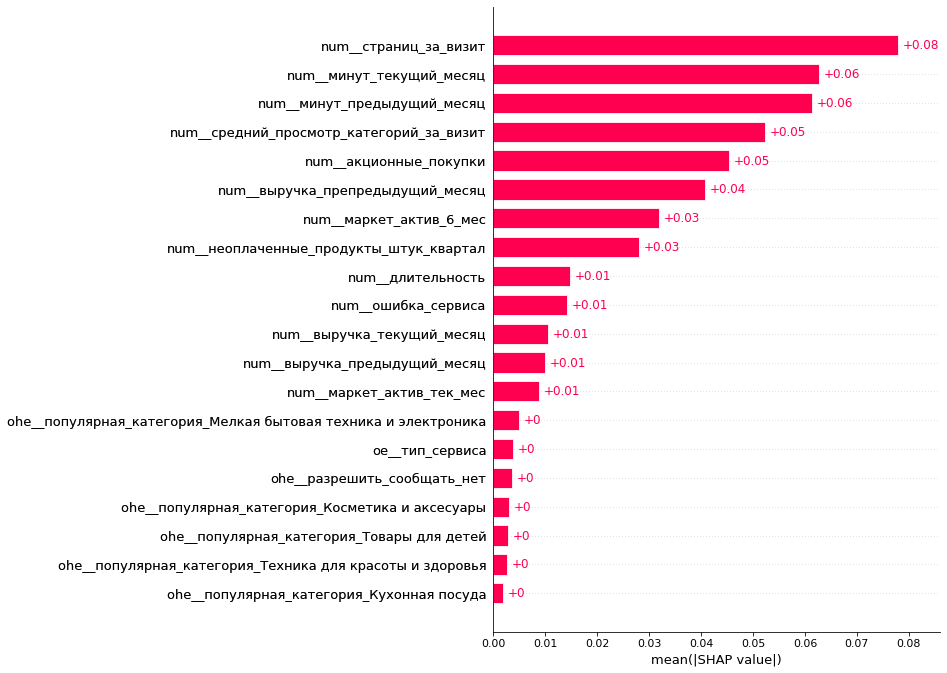

In [54]:
# Создаем объект объяснения SHAP
shap_exp = shap.Explanation(values=shap_values[:,:,1],  # SHAP-значения для второго класса
                            base_values=explainer.expected_value[1],  # Среднее предсказание для второго класса
                            data=X_test_t,
                            feature_names=feature_names)

# Построение графика
shap.plots.bar(shap_exp, max_display=30)

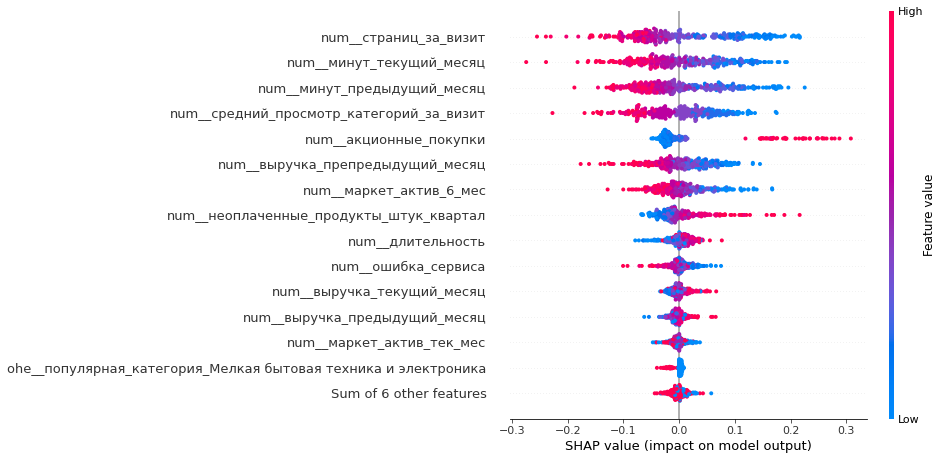

In [55]:
shap.plots.beeswarm(shap_exp, max_display=15)

Выводы о значимости признаков. Признаки, которые имеют нулевые значения SHAP, могут быть менее важными для предсказания целевой переменной, например,  популярные категории 'кухонная посуда', 'техника для красоты и здоровья', 'товары для детей'.

Признаки с высокой значимостью. Страниц за визит имеет высокие значения SHAP, что свидетельствует о его значительном влиянии на предсказания модели. Это может указывать на то, что более активные пользователи, просматривающие больше страниц, имеют более высокие шансы на конверсии. Кроме того, минут текущий и предыдущий месяц, показывают, что время, проведенное пользователями на платформе, имеет значительное влияние на предсказания.

Учитывая, что некоторые признаки имеют низкую значимость, можно рассмотреть возможность их исключения из модели, что может привести к улучшению производительности и уменьшению времени обучения. Сосредоточение на наиболее значимых признаках поможет улучшить интерпретируемость модели и ее предсказательную способность.

Бизнес-стратегии. Увеличение вовлеченности пользователей: Поскольку страницы за визит оказывают сильное влияние на предсказания, бизнес может разработать стратегии, направленные на увеличение вовлеченности пользователей, например, через улучшение интерфейса или внедрение рекомендаций.
Анализ поведения пользователей: Использование данных о времени, проведенном на платформе, может помочь в выявлении паттернов поведения пользователей и оптимизации маркетинговых усилий.

Эти выводы могут помочь в более целенаправленном подходе к моделированию и принятию бизнес-решений, что в свою очередь может привести к улучшению результатов и повышению удовлетворенности клиентов.

## Сегментация покупателей
<a id='str8'></a>

In [56]:
# Получение вероятностей для всего набора данных
y_proba_full = best_model.predict_proba(merged_data)

# Добавление вероятностей активности
merged_data["вероятность_снижения"] = y_proba_full[:, 1]

# Прибыль
merged_data = merged_data.merge(profit, on='id', how='inner')

# Сортировка по вероятности активности
merged_data = merged_data.sort_values(by="вероятность_снижения", ascending=False)

display(merged_data.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1.0,4.16
185,215537,1,премиум,да,3.9,4,705,0.99,Косметика и аксесуары,3,3,7,4,6121.5,4974.0,6781.9,7,9,1.0,1.81
163,215515,1,стандарт,нет,4.0,3,509,0.94,Косметика и аксесуары,2,6,4,6,4395.5,4442.0,4067.9,7,13,1.0,2.84
167,215519,1,премиум,да,3.1,5,824,0.94,Товары для детей,2,2,4,4,3680.0,4802.0,4283.2,8,8,1.0,5.56
169,215521,1,премиум,нет,1.5,3,541,0.90,Товары для детей,2,4,4,5,4045.0,4265.0,4650.8,11,13,1.0,3.58


<Axes: title={'center': 'прибыль vs вероятность снижения'}, xlabel='прибыль', ylabel='вероятность_снижения'>

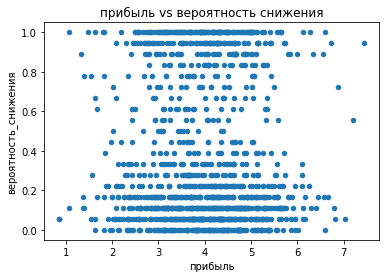

In [57]:
merged_data.plot(kind='scatter', x="прибыль", y="вероятность_снижения", title='прибыль vs вероятность снижения')

Видна дискретность в вероятности, что может быть объяснено применением KNN. Попробуем сделать калибровку.

In [58]:
calibrator = CalibratedClassifierCV(best_model, method='sigmoid')
calibrator.fit(X, y)

CalibratedClassifierCV(estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('ohe',
                                                                                   Pipeline(steps=[('simpleImputer_ohe',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('ohe',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['разрешить_сообщать',
                                                                                    'популярная_категория']),
                                                                                  ('oe',
                                                                                   Pipeline(steps=[('simpleImputer_o...
                                                                                    'маркет_актив_тек_мес',
                                                                                    'длительность',
                                                                                    'акционные_покупки',
                                                                                    'средний_просмотр_категорий_за_визит',
                                                                                    'неоплаченные_продукты_штук_квартал',
                                                                                    'ошибка_сервиса',
                                                                                    'страниц_за_визит',
                                                                                    'выручка_препредыдущий_месяц',
                                                                                    'минут_предыдущий_месяц',
                                                                                    'минут_текущий_месяц',
                                                                                    'выручка_текущий_месяц',
                                                                                    'выручка_предыдущий_месяц'])])),
                                                 ('model',
                                                  KNeighborsClassifier(n_neighbors=18))]))

In [59]:
# Получение вероятностей для всего набора данных
y_proba_full = calibrator.predict_proba(merged_data)

# Добавление вероятностей активности
merged_data["вероятность_снижения"] = y_proba_full[:, 1]

In [60]:
# Переведем некоторые числовые столбцы в категориальные, для выбора группы
merged_data["акционные_покупки"] = merged_data["акционные_покупки"]\
.apply( lambda x: 'Часто' if x>= 0.5 else 'Редко' )

merged_data["неоплаченные_продукты_штук_квартал"] = merged_data["неоплаченные_продукты_штук_квартал"]\
.apply( lambda x: 'Много' if x>= 3.0 else 'Мало' )

merged_data["страниц_за_визит"] = merged_data["страниц_за_визит"]\
.apply( lambda x: 'Много' if x>= 5.0 else 'Мало' )

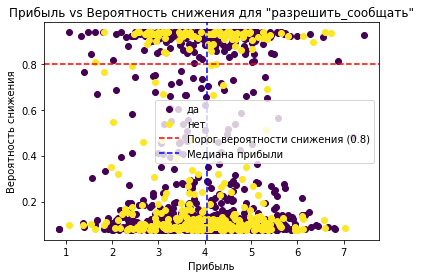

In [61]:
# Построение графика с порогами
categories = merged_data["разрешить_сообщать"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    subset = merged_data[merged_data["разрешить_сообщать"] == category]
    plt.scatter(subset["прибыль"], subset["вероятность_снижения"], label=category, color=colors[i])

plt.axhline(0.8, color='red', linestyle='--', label='Порог вероятности снижения (0.8)')
plt.axvline(merged_data["прибыль"].median(), color='blue', linestyle='--', label='Медиана прибыли')
plt.title('Прибыль vs Вероятность снижения для "разрешить_сообщать"')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения')
plt.legend()
plt.show()

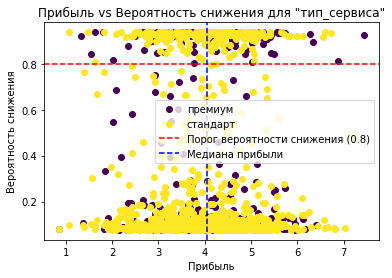

In [62]:
# Построение графика с порогами
categories = merged_data["тип_сервиса"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    subset = merged_data[merged_data["тип_сервиса"] == category]
    plt.scatter(subset["прибыль"], subset["вероятность_снижения"], label=category, color=colors[i])

plt.axhline(0.8, color='red', linestyle='--', label='Порог вероятности снижения (0.8)')
plt.axvline(merged_data["прибыль"].median(), color='blue', linestyle='--', label='Медиана прибыли')
plt.title('Прибыль vs Вероятность снижения для "тип_сервиса"')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения')
plt.legend()
plt.show()

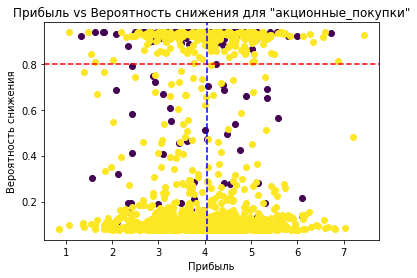

In [63]:
# Построение графика с порогами
categories = merged_data["акционные_покупки"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    subset = merged_data[merged_data["акционные_покупки"] == category]
    plt.scatter(subset["прибыль"], subset["вероятность_снижения"], label=category, color=colors[i])

plt.axhline(0.8, color='red', linestyle='--', label='Порог вероятности снижения (0.8)')
plt.axvline(merged_data["прибыль"].median(), color='blue', linestyle='--', label='Медиана прибыли')
plt.title('Прибыль vs Вероятность снижения для "акционные_покупки"')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения')
plt.show()

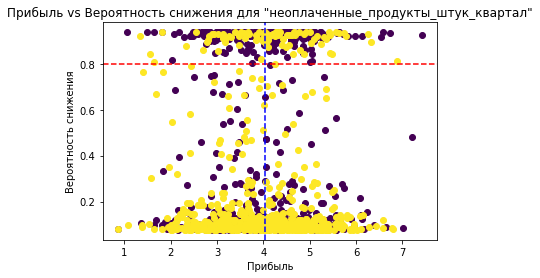

In [64]:
# Построение графика с порогами
categories = merged_data["неоплаченные_продукты_штук_квартал"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    subset = merged_data[merged_data["неоплаченные_продукты_штук_квартал"] == category]
    plt.scatter(subset["прибыль"], subset["вероятность_снижения"], label=category, color=colors[i])

plt.axhline(0.8, color='red', linestyle='--', label='Порог вероятности снижения (0.8)')
plt.axvline(merged_data['прибыль'].median(), color='blue', linestyle='--', label='Медиана прибыли')
plt.title('Прибыль vs Вероятность снижения для "неоплаченные_продукты_штук_квартал"')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения')
plt.show()

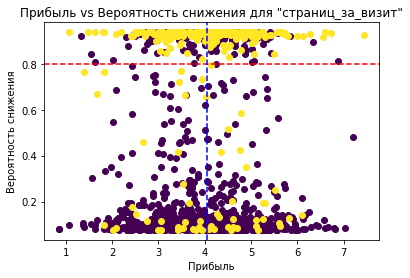

In [65]:
# Построение графика с порогами
categories = merged_data["страниц_за_визит"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    subset = merged_data[merged_data["страниц_за_визит"] == category]
    plt.scatter(subset["прибыль"], subset["вероятность_снижения"], label=category, color=colors[i])

plt.axhline(0.8, color='red', linestyle='--', label='Порог вероятности снижения (0.8)')
plt.axvline(merged_data['прибыль'].median(), color='blue', linestyle='--', label='Медиана прибыли')
plt.title('Прибыль vs Вероятность снижения для "страниц_за_визит"')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения')
plt.show()

Больше всего выбиваются акционные покупки и страниц за визит. Объекты категории акционные покупки имеют более высокие риски или высокую вероятность снижения, поэтому для исследования нужно взять этот сегмент.

In [66]:
# Функция для сегментации
def segment_customers(row):
    if row["вероятность_снижения"] >= 0.8 and row["акционные_покупки"] == 'Часто':
        return 'целевой сегмент'
    else:
        return 'остальные покупатели'

# Применение функции к DataFrame
merged_data["сегмент"] = merged_data.apply(segment_customers, axis=1)

# Проверка результатов
merged_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,...,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,прибыль,сегмент
0,215349,1,премиум,да,4.4,4,819,Часто,Товары для детей,4,...,2,Много,5216.0,4472.0,4971.6,12,10,0.935884,4.16,целевой сегмент
185,215537,1,премиум,да,3.9,4,705,Часто,Косметика и аксесуары,3,...,7,Мало,6121.5,4974.0,6781.9,7,9,0.936496,1.81,целевой сегмент
163,215515,1,стандарт,нет,4.0,3,509,Часто,Косметика и аксесуары,2,...,4,Много,4395.5,4442.0,4067.9,7,13,0.936496,2.84,целевой сегмент
167,215519,1,премиум,да,3.1,5,824,Часто,Товары для детей,2,...,4,Мало,3680.0,4802.0,4283.2,8,8,0.936496,5.56,целевой сегмент
169,215521,1,премиум,нет,1.5,3,541,Часто,Товары для детей,2,...,4,Много,4045.0,4265.0,4650.8,11,13,0.936496,3.58,целевой сегмент


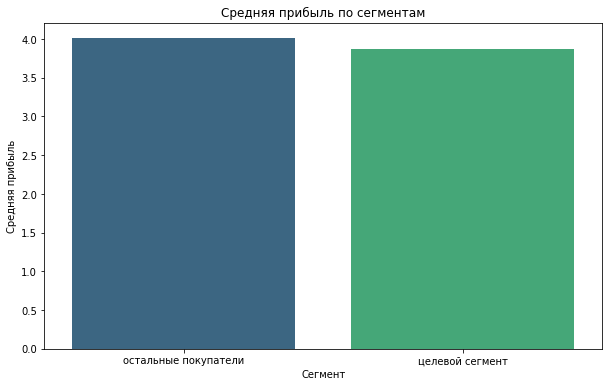

In [67]:
# Сравнение средней прибыли
plt.figure(figsize=(10, 6))
mean_profit = merged_data.groupby("сегмент")["прибыль"].mean().reset_index()
sns.barplot(data=mean_profit, x="сегмент", y="прибыль", palette='viridis')
plt.title('Средняя прибыль по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Средняя прибыль')
plt.show()

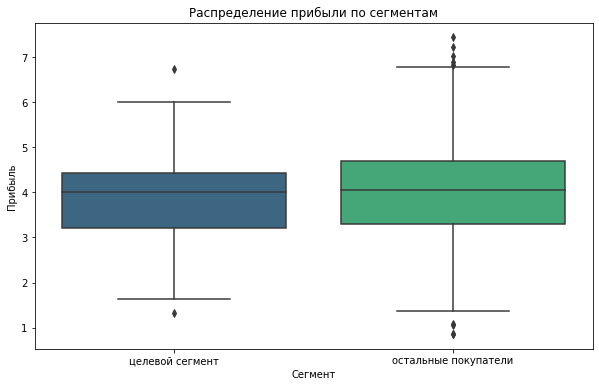

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x="сегмент", y="прибыль", palette='viridis')
plt.title('Распределение прибыли по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Прибыль')
plt.show()

Средняя прибыль целевого сегмента немного ниже, чем у остальных покупателей, целевой сегмент покупает товары со скидками или акциями, что снижает общую прибыль. Также, целевой сегмент может совершать больше покупок, но с меньшей маржой, что также может привести к снижению средней прибыли.

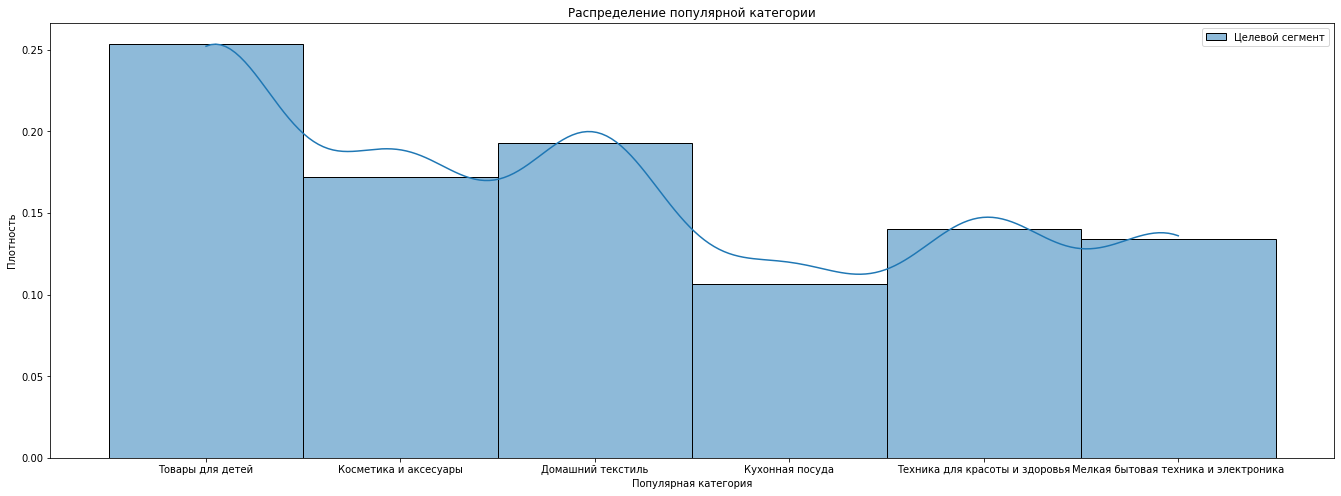

In [69]:
plt.figure(figsize=(23, 8))
sns.histplot(merged_data["популярная_категория"], label='Целевой сегмент', kde=True, stat='density')
plt.title('Распределение популярной категории')
plt.xlabel('Популярная категория')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Категория "Товары для детей" демонстрирует наибольшую популярность среди целевого сегмента. Для маркетинговых стратегий целевого сегмента можно рассмотреть акцент на уникальные предложения и акции для родителей. Домашний текстиль занимает второе место по популярности. Для целевого сегмента стоит рассмотреть возможность предложений, связанных с сезонными акциями или новыми коллекциями, чтобы привлечь внимание к этой категории. Косметика и аксессуары имеет меньшую популярность по сравнению с товарами для детей и домашним текстилем, но все же остается значимой.

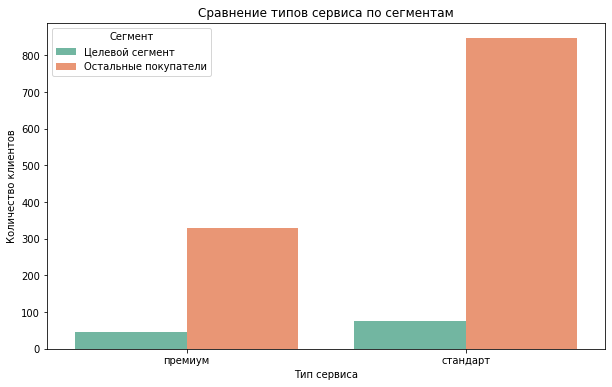

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x="тип_сервиса", hue="сегмент", data=merged_data, palette='Set2')
plt.title('Сравнение типов сервиса по сегментам')
plt.xlabel('Тип сервиса')
plt.ylabel('Количество клиентов')
plt.legend(title='Сегмент', labels=['Целевой сегмент', 'Остальные покупатели'])
plt.show()

Визуализация показала, что большинство клиентов из целевого сегмента предпочитают стандартный тип сервиса по сравнению с премиум. Это может указывать на то, что целевой сегмент более чувствителен к цене и предпочитает более доступные варианты обслуживания. Учитывая, что стандартный сервис является более популярным, это может быть важной точкой для маркетинговых стратегий. Возможно, стоит сосредоточиться на продвижении преимуществ стандартного сервиса, чтобы привлечь больше клиентов из целевого сегмента.

Среди остальных покупателей также наблюдается явное преобладание стандартного типа сервиса по сравнению с премиум. Это свидетельствует о том, что стандартный сервис является более предпочтительным вариантом для широкой аудитории, что может быть связано с его доступностью и ценовой политикой. Подобно целевому сегменту, остальные покупатели также проявляют большую заинтересованность в стандартном сервисе. Это может указывать на общую тенденцию среди клиентов к выбору более экономичных решений, что важно учитывать при разработке маркетинговых стратегий. Несмотря на популярность стандартного сервиса, это также может означать, что существует возможность для улучшения и продвижения премиум услуг. Возможно, стоит исследовать, какие именно аспекты премиум сервиса могут быть интересны остальным покупателям, и как можно донести эти преимущества до целевой аудитории.

Учитывая, что стандартный сервис является наиболее популярным как среди целевого сегмента, так и среди остальных покупателей, компании следует рассмотреть возможность дальнейшей сегментации своих предложений. Это может помочь в создании более персонализированных маркетинговых кампаний и улучшении взаимодействия с клиентами.

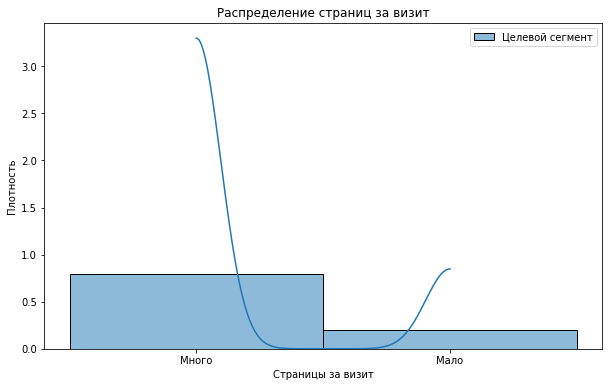

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data["страниц_за_визит"], label='Целевой сегмент', kde=True, stat='density')
plt.title('Распределение страниц за визит')
plt.xlabel('Страницы за визит')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Анализ распределения количества страниц, просмотренных пользователями за один визит, показывает, что у целевого сегмента наблюдается значительное количество визитов, где пользователи просматривают много страниц. Это может указывать на более глубокую вовлеченность и интерес к предлагаемым продуктам или услугам. Учитывая большую вовлеченность пользователей, можно предложить им дополнительные рекомендации, специальные предложения или контент, который соответствует их интересам. Для пользователей, которые просматривают меньше страниц, стоит рассмотреть возможность улучшения пользовательского опыта, упрощения навигации и создания более привлекательного контента, чтобы повысить их вовлеченность. Кроме того, использование данных о поведении пользователей для создания персонализированных предложений может помочь увеличить количество страниц, которые пользователи просматривают за визит.

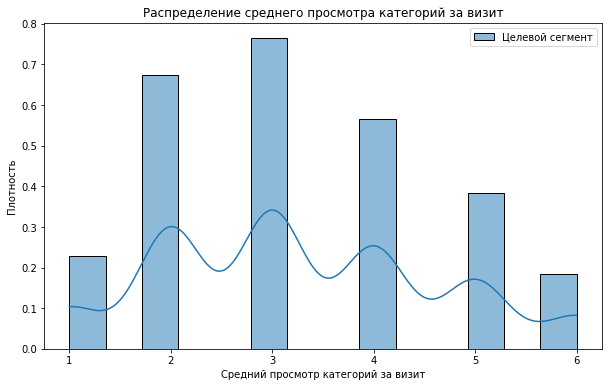

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data["средний_просмотр_категорий_за_визит"], label='Целевой сегмент', kde=True, stat='density')
plt.title('Распределение среднего просмотра категорий за визит')
plt.xlabel('Средний просмотр категорий за визит')
plt.ylabel('Плотность')
plt.legend()
plt.show()

В среднем покупатели из целевого сегмента просматривали 3 категории за визит, что указывает на их активное участие и интерес к продуктам, представленным в этих категориях. Затем наблюдается снижение до 2 категорий, что может свидетельствовать о том, что часть клиентов не так активно исследует ассортимент или предпочитает более узкий выбор. Наконец, увеличение до 4 категорий может говорить о том, что некоторые покупатели проявляют интерес к более широкому ассортименту, возможно, в поисках выгодных предложений или новых товаров.  Снижение среднего числа просмотренных категорий может быть сигналом о необходимости улучшения пользовательского опыта. Например, стоит рассмотреть возможность оптимизации навигации по сайту или приложения, чтобы облегчить доступ к различным категориям и повысить интерес покупателей. Учитывая эти данные, маркетинговые кампании могут быть адаптированы для привлечения внимания к категориям, которые покупатели менее активно исследуют. Это может включать в себя специальные предложения, промоакции или рекомендации на основе предыдущих покупок.

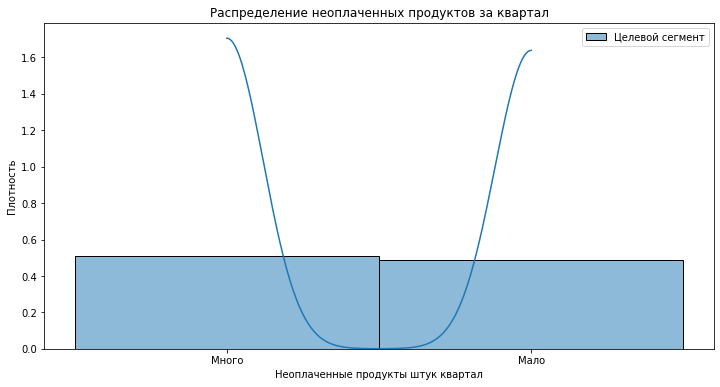

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_data["неоплаченные_продукты_штук_квартал"], label='Целевой сегмент', kde=True, stat='density')
plt.title('Распределение неоплаченных продуктов за квартал')
plt.xlabel('Неоплаченные продукты штук квартал')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Анализ распределения неоплаченных продуктов за квартал среди целевого сегмента и остальных покупателей показывает, что в целевом сегменте наблюдается более высокая концентрация клиентов с большим количеством неоплаченных продуктов. Высокое количество неоплаченных продуктов может свидетельствовать о том, что целевой сегмент сталкивается с трудностями в процессе завершения покупок, возможно, из-за недостаточной мотивации, сложностей с оплатой или нехватки информации о товаре. С другой стороны, это может говорить о том, что клиенты целевого сегмента активно исследуют предложения, но по каким-то причинам не завершают покупки. Это создает возможность для дополнительного маркетинга и работы над конверсией. Возможно, клиенты из целевого сегмента более чувствительны к ценам, что приводит к тому, что они добавляют много товаров в корзину, но не завершают покупку из-за высокой стоимости.Нужно провести глубокий анализ, чтобы понять, почему клиенты не завершают покупки. Это может включать опросы, анализ поведения на сайте и изучение отзывов.Также можно упростить процесс оформления заказа и внедрить дополнительные методов оплаты.

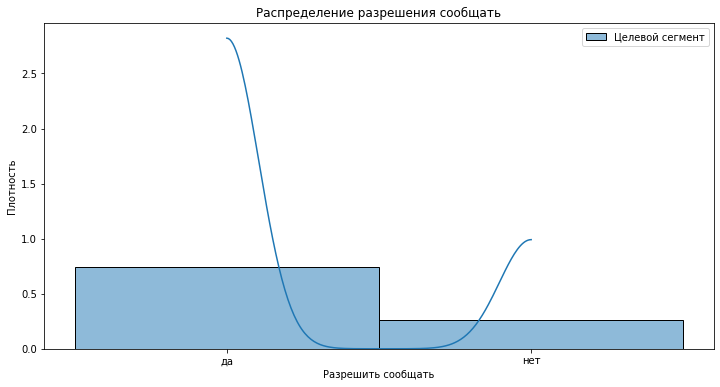

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_data["разрешить_сообщать"], label='Целевой сегмент', kde=True, stat='density')
plt.title('Распределение разрешения сообщать')
plt.xlabel('Разрешить сообщать')
plt.ylabel('Плотность')
plt.legend()
plt.show()

На основании анализа данных о предпочтениях клиентов в отношении разрешения на получение сообщений, большинство клиентов из целевого сегмента и остальных покупателей предпочитают давать разрешение на получение сообщений. Это может свидетельствовать о высоком уровне заинтересованности в коммуникации с брендом и готовности получать обновления, предложения и другую информацию. Высокий процент положительных ответов на запросы о разрешении на сообщения открывает возможности для разработки более персонализированных маркетинговых стратегий. Бренды могут использовать эти данные для создания целевых кампаний, которые будут направлены на клиентов, согласившихся на получение информации, что, в свою очередь, может повысить уровень вовлеченности и удовлетворенности.

На основании проведенного анализа данных о покупательских предпочтениях и поведении клиентов можно сделать следующие выводы о сегментах. Целевой сегмент демонстрирует высокую активность в акционных покупках и просмотрах страниц за визит, что указывает на его заинтересованность в выгодных предложениях.
Средняя прибыль целевого сегмента ниже, что связано с покупкой товаров со скидками или акциями, что может указывать на необходимость оптимизации предложений для повышения маржи.
Наибольшая популярность категории "Товары для детей" указывает на возможность акцентирования маркетинговых стратегий на уникальных предложениях для родителей и сезонных акциях.
Высокая концентрация неоплаченных продуктов в этом сегменте указывает на потенциальные проблемы с конверсией, что требует дополнительного анализа и внедрения улучшений в процесс оформления заказа.

Остальные покупатели также предпочитают стандартный тип сервиса, что может свидетельствовать о ценовой чувствительности и предпочтении более доступных вариантов.
Стандартный сервис является наиболее популярным как среди целевого сегмента, так и среди остальных покупателей, что указывает на общую тенденцию к выбору экономичных решений.
Остальные покупатели также проявляют интерес к акционным предложениям, но в меньшей степени, чем целевой сегмент.

Сегмент акционные покупки был выбран для дополнительного исследования, так как уникальные характеристики этого сегмента, такие как высокая вовлеченность и интерес к определенным категориям товаров, создают возможности для более целенаправленных маркетинговых стратегий.

Предложения направлены на улучшение взаимодействия с клиентами, повышение уровня их удовлетворенности и увеличение продаж, так как:
- Акционные покупки и количество страниц за визит являются ключевыми показателями, которые выделяются в анализе. Это указывает на высокий интерес клиентов к скидкам и акциям, что может быть использовано для дальнейших маркетинговых стратегий. Средняя прибыль целевого сегмента ниже, чем у остальных покупателей, что связано с покупками товаров со скидками. Это требует пересмотра ценовой политики и акцентирования внимания на более высоком качестве товаров или на уникальных предложениях.
- Категория "Товары для детей" и "Домашний текстиль" демонстрируют наибольшую популярность. Это открывает возможности для создания акций и предложений, направленных на родителей и семьи.
- Преобладание стандартного типа сервиса среди клиентов указывает на чувствительность к цене. Это может стать основой для акцентирования на преимуществах стандартного сервиса в маркетинговых кампаниях.
- Высокий уровень вовлеченности целевого сегмента, проявляющийся в количестве просмотренных страниц и категорий, указывает на интерес к продуктам. Это создает возможности для персонализированных предложений и рекомендаций.
- Высокое количество неоплаченных продуктов в целевом сегменте может указывать на сложности в процессе завершения покупок. Это требует анализа причин и возможного упрощения процесса оформления заказа.
- Высокий уровень согласия на получение сообщений свидетельствует о готовности клиентов взаимодействовать с брендом. Это открывает возможности для создания целевых и персонализированных маркетинговых кампаний.

## Общий вывод
<a id='str9'></a>

Проект, направленный на повышение покупательской активности постоянных клиентов интернет-магазина «В один клик», ставит перед собой важную задачу: выявление клиентов с риском снижения активности и предложение им персонализированных предложений. В условиях снижения активности покупателей, компания понимает, что привлечение новых клиентов становится менее эффективным, и акцент необходимо сделать на удержании существующих.
Основная задача заключается в анализе данных о клиентах и их поведении для создания модели, способной предсказать вероятность снижения покупательской активности. Для этого было необходимо следующее:

- Сбор данных: Необходимо собрать и проанализировать данные о коммуникации с клиентами, их продуктовом и покупательском поведении, а также времени, проведенном на сайте. Эти данные будут собраны из нескольких таблиц, которые содержат информацию о действиях клиентов, их расходах и времени, проведенном на сайте.

- Предобработка данных: На этом этапе важно проверить данные на наличие пропусков и дубликатов, а также убедиться в корректности типов данных. Это обеспечит надежность последующего анализа.

- Исследовательский анализ данных: Статистический анализ всех признаков позволит выделить клиентов с активностью за последние три месяца, что является критерием для дальнейшего анализа.

- Объединение таблиц: Для более глубокого анализа необходимо объединить данные из разных источников, создавая единую таблицу, где каждый признак будет представлен для каждого клиента.

- Корреляционный анализ: Этот этап поможет выявить взаимосвязи между признаками и определить, какие из них могут влиять на снижение активности.

- Моделирование: С использованием различных алгоритмов машинного обучения (таких как KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC) будет выбрана лучшая модель, которая покажет наилучшие результаты в предсказании активности клиентов.

- Анализ важности признаков: Оценка значимости различных признаков для выбранной модели позволит понять, какие факторы наиболее влияют на покупательское поведение и как эти данные могут быть использованы для принятия бизнес-решений.

- Сегментация покупателей: На основе полученных данных будет проведена сегментация клиентов, что позволит разработать персонализированные предложения для каждой группы, направленные на увеличение их активности.

Результаты проекта должны привести к улучшению финансовых показателей магазина и более эффективному использованию ресурсов отдела цифровых технологий. В итоге, проект станет основой для принятия обоснованных и стратегически выверенных бизнес-решений. 

Исходные данные представляют собой четыре таблицы, содержащие важную информацию о поведении покупателей в интернет-магазине, их взаимодействии с сервисом и финансовых показателях. Каждая таблица содержит уникальные и полезные данные, которые помогут в анализе покупательской активности и разработке персонализированных предложений. Вот краткое описание каждой таблицы:
1. market_file.csv: Содержит информацию о поведении покупателей на сайте, включая их активность, тип сервиса, согласие на получение предложений, маркетинговую активность, акционные покупки, популярные категории товаров и другие метрики, которые помогают понять предпочтения и поведение клиентов.
2. market_money.csv: Содержит данные о выручке, полученной от каждого покупателя за определённые периоды. Эти данные важны для оценки финансовой эффективности взаимодействия с клиентами.
3. market_time.csv: Включает информацию о времени, проведённом покупателями на сайте, что позволяет анализировать, сколько времени клиенты тратят на изучение товаров и совершение покупок.
4. money.csv: Содержит данные о среднемесячной прибыли, получаемой от каждого покупателя за последние три месяца, что помогает оценить долгосрочную рентабельность бизнеса.

На этапе предобработки данных были выполнены следующие шаги. Все четыре таблицы были успешно загружены и соответствовали описанию. В каждом из датафреймов не было обнаружено пропусков и дубликатов, что говорит о полноте и уникальности данных. Все названия столбцов были проверены на предмет опечаток и приведены в нижний регистр для унификации. Это улучшает удобство работы с данными и минимизирует вероятность ошибок при обращении к столбцам. Все изменения были проверены, и данные готовы к дальнейшему анализу и использованию. В результате проведённой предобработки данные стали более структурированными и удобными для анализа, что создаёт хорошую основу для последующих этапов проекта, включая исследовательский анализ, моделирование и сегментацию клиентов. Это, в свою очередь, поможет разработать более целенаправленные и эффективные маркетинговые стратегии для увеличения покупательской активности и прибыли компании.

В ходе выполнения проекта по повышению покупательской активности клиентов интернет-магазина «В один клик» был проведен комплексный анализ и обучение нескольких моделей машинного обучения с использованием пайплайнов. Данные были разделены на обучающую и тестовую выборки. Целевой признак «покупательская активность» был закодирован в бинарный формат (0 и 1). Для обработки количественных и категориальных признаков был использован ColumnTransformer, который позволил обрабатывать их раздельно. Для кодирования категориальных признаков применялись два кодировщика (например, OneHotEncoder), а для масштабирования количественных признаков использовались два скейлера (например, StandardScaler и MinMaxScaler).

Для каждой модели был создан отдельный пайплайн, включающий этапы предобработки данных и обучения модели. Это обеспечило модульность и возможность легко изменять параметры предобработки и модели. Были обучены четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC. Для каждой модели был подобран хотя бы один гиперпараметр, что позволило оптимизировать их производительность. В качестве метрики для оценки моделей была выбрана ROC-AUC, так как она хорошо отражает качество бинарной классификации, особенно в условиях несбалансированных классов. Эта метрика была использована при подборе гиперпараметров.

Для поиска наилучшей модели использовался GridSearchCV, который осуществлял перебор параметров для каждой модели в рамках общего пайплайна. Это позволило эффективно находить наилучшие параметры и выбирать модель с наивысшими значениями ROC-AUC.

В результате проведенного анализа была выбрана модель KNeighborsClassifier с оптимальными гиперпараметрами: количество соседей (n_neighbors) равно 18, а для числовых признаков используется StandardScaler для их нормализации. Полученные результаты показывают впечатляющую эффективность модели: ROC-AUC на обучающей выборке составил 0.90, что указывает на хорошую способность модели различать классы. Для тестовой выборки ROC-AUC составил 0.92, что также свидетельствует о ее высокой надежности.

Дополнительно, F1-score тестовой выборки достиг значения 0.88, что подтверждает отличное сочетание точности и полноты модели. Эти результаты подчеркивают, что выбранная модель KNeighborsClassifier, наряду с соответствующими методами предобработки данных, демонстрирует выдающиеся показатели и является подходящим решением для поставленной задачи. Такой успех также акцентирует важность тщательной настройки гиперпараметров для достижения наилучших результатов.

На основании проведенного анализа данных о покупательских предпочтениях и поведении клиентов можно сделать следующие выводы о сегментах. Целевой сегмент демонстрирует высокую активность в акционных покупках и значительное количество просмотров страниц за визит, что указывает на его заинтересованность в выгодных предложениях. Однако средняя прибыль целевого сегмента ниже, что связано с покупкой товаров со скидками или акциями. Это подчеркивает необходимость оптимизации предложений для повышения маржи.

Наибольшая популярность категории "Товары для детей" открывает возможности для акцентирования маркетинговых стратегий на уникальных предложениях для родителей и сезонных акциях. Кроме того, высокая концентрация неоплаченных продуктов в этом сегменте указывает на потенциальные проблемы с конверсией, что требует дополнительного анализа и внедрения улучшений в процесс оформления заказа.

Остальные покупатели также предпочитают стандартный тип сервиса, что может свидетельствовать о ценовой чувствительности и предпочтении более доступных вариантов. Стандартный сервис является наиболее популярным как среди целевого сегмента, так и среди остальных покупателей, что указывает на общую тенденцию к выбору экономичных решений. Остальные покупатели также проявляют интерес к акционным предложениям, но в меньшей степени, чем целевой сегмент.

Дополнительные предложения для активации целевого сегмента покупателей:
- Разработка кампаний по электронной почте с персонализированными предложениями, основанными на предыдущих просмотрах и интересах, может помочь вернуть неактивных покупателей.
- Проведение A/B тестирования различных акций и скидок для определения наиболее эффективных предложений в привлечении неактивных покупателей.
- Проведение опросов среди покупателей для понимания причин их низкой активности и выявления конкретных проблем, таких как сложность навигации или отсутствие нужных товаров.
- Разработка контента, который объясняет преимущества продуктов, их использование и советы по выбору, может повысить осведомленность о продуктах и их ценности.
- Создание лимитированных предложений или акций, которые создают ощущение срочности, может побудить покупателей к действию.
- Использование отзывов и оценок от других покупателей для создания доверия к продуктам.
- Внедрение программ рефералов, где покупатели могут получать бонусы за привлечение новых клиентов.
- Использование рекламных кампаний по ретаргетингу, чтобы напомнить о товарах, которые они рассматривали, или о специальных предложениях.
- Улучшение пользовательского интерфейса сайта для упрощения навигации и процесса покупки.

Эти предложения направлены на активизацию целевого сегмента, используя их предыдущий интерес и поведение. Реализация этих стратегий может существенно повысить общую выручку и улучшить показатели бизнеса, превращая потенциально потерянных клиентов в активных покупателей.